In [24]:
"""LCR+PID_(Z & theta & temp vs time) @ freq"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter
ser_cn740 = DeviceConnect_CN740('/dev/cu.usbserial-BG00XWYD')  # Omega CN740 (RS-485)


"""Experiment"""

voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 3 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
timestamp = time.strftime("%H%M")

"""Added for Experiment_b3"""
freq_fixed = 75*1000 # Hz
set_temp = 18 # SV in degC
until_temp = 25 # degC

try:
    material = input('Material? ')    
    info = f', Area:, {area}, mm^2, Thickness:, {thickness}, mm, voltage:, {voltage}, V, n={numMeasurements}, freq_fixed:, {freq_fixed}, Hz'
    dataFrame = Experiment_b3(ser_lcr, freq_fixed, voltage, biasVoltage, numMeasurements, ser_cn740, set_temp,until_temp)
    DataExport_b(material, dataFrame, info, timestamp)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        DataExport_b(material, dataFrame, info, timestamp)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)
    DeviceDisconnect(ser_cn740)

end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

      Time (s)    PV    SV        Z Avg.      Z Std.   THR Avg.  THR Std.
0          0.1  69.1  18.0  1.401137e+06  505.327177 -86.956200  0.023701
1          0.8  68.9  18.0  1.400423e+06  147.271480 -86.977100  0.022416
2          1.6  68.5  18.0  1.401253e+06  731.771063 -86.955033  0.021277
3          2.4  68.5  18.0  1.401087e+06  177.826382 -86.964833  0.019802
4          3.2  67.3  18.0  1.401143e+06  572.499393 -86.997800  0.001627
...        ...   ...   ...           ...         ...        ...       ...
3418    2665.9  25.1  18.0  1.403553e+06  167.796173 -86.959133  0.013281
3419    2666.6  25.1  18.0  1.403323e+06  604.281024 -86.962467  0.019195
3420    2667.4  25.1  18.0  1.403307e+06  232.999762 -86.979033  0.008348
3421    2668.2  25.1  18.0  1.403413e+06  231.564726 -86.963533  0.022939
3422    2669.0  25.1  18.0  1.404197e+06  613.260865 -86.988400  0.015932

[3423 rows x 7 columns]
Test completed


Data saved to Data/1714_s5-pf-b3-cooling_Z_THR.csv
Total runtime = 268

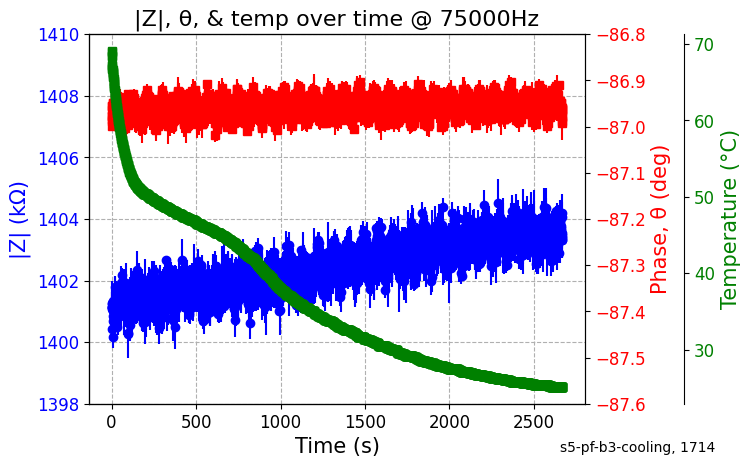

In [31]:
fig, ax1 = plt.subplots()

# Left Y-axis: |Z|
ax1.errorbar(
    dataFrame['Time (s)'], dataFrame['Z Avg.'] / 1000, yerr=dataFrame['Z Std.'] / 1000,
    fmt='o-', color='blue', label='|Z|')
ax1.set_xlabel('Time (s)', fontsize=15)
ax1.set_ylabel('|Z| (kΩ)', color='blue', fontsize=15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)
#ax1.set_ylim(594,599)
#ax1.set_ylim(776,782)
ax1.set_ylim(1398,1410)

# Right Y-axis #1: Phase θ
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Time (s)'], dataFrame['THR Avg.'], yerr=dataFrame['THR Std.'],
    fmt='s--', color='red', label='Phase θ')
ax2.set_ylabel('Phase, θ (deg)', color='red', fontsize=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
#ax2.set_ylim(-88.1,-87.5)
#ax2.set_ylim(-88.3,-87.9)
ax2.set_ylim(-87.6,-86.8)

# Right Y-axis #2 (offset): Temperature
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))  # Move this y-axis to the right
ax3.plot(
    dataFrame['Time (s)'], dataFrame['PV'],
    marker='s', linestyle='--', color='green', label='Temperature')
ax3.set_ylabel('Temperature (°C)', color='green', fontsize=15)
ax3.tick_params(axis='y', labelcolor='green', labelsize=12)
#ax3.set_ylim(15,70)

# Add grid and title
ax1.grid(True, which='both', ls='--')
plt.title(f'|Z|, θ, & temp over time @ {freq_fixed}Hz', fontsize=16)

plt.show()

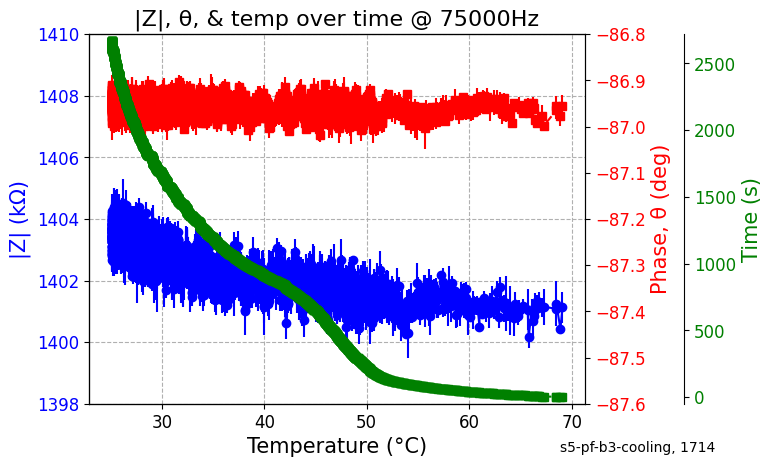

In [33]:
fig, ax1 = plt.subplots()

# Left Y-axis: |Z|
ax1.errorbar(
    dataFrame['PV'], dataFrame['Z Avg.'] / 1000, yerr=dataFrame['Z Std.'] / 1000,
    fmt='o-', color='blue', label='|Z|')
ax1.set_xlabel('Temperature (°C)', fontsize=15)
ax1.set_ylabel('|Z| (kΩ)', color='blue', fontsize=15)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)
#ax1.set_ylim(594,599)
#ax1.set_ylim(776,782)
ax1.set_ylim(1398,1410)

# Right Y-axis #1: Phase θ
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['PV'], dataFrame['THR Avg.'], yerr=dataFrame['THR Std.'],
    fmt='s--', color='red', label='Phase θ')
ax2.set_ylabel('Phase, θ (deg)', color='red', fontsize=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
#ax2.set_ylim(-88.7,-88.)
#ax2.set_ylim(-88.3,-87.9)
ax2.set_ylim(-87.6,-86.8)

# Right Y-axis #2 (offset): Temperature
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))  # Move this y-axis to the right
ax3.plot(
    dataFrame['PV'], dataFrame['Time (s)'],
    marker='s', linestyle='--', color='green', label='Temperature')
ax3.set_ylabel('Time (s)', color='green', fontsize=15)
ax3.tick_params(axis='y', labelcolor='green', labelsize=12)
ax3.set_ylim(-50, dataFrame['Time (s)'].max()+50)

# Add grid and title
ax1.grid(True, which='both', ls='--')
plt.title(f'|Z|, θ, & temp over time @ {freq_fixed}Hz', fontsize=16)

plt.show()